<a href="https://colab.research.google.com/github/rubenDirinott/Entrega-Data-Ciencia-II-/blob/main/TP1/01ProyetoIIpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion
El presente proyecto tiene como objetivo aplicar técnicas de análisis de datos y visualización para explorar el comportamiento de las ventas en la industria de la asistencia al viajero. En un contexto global donde los viajes han retomado dinamismo tras la pandemia, las empresas del sector deben comprender en profundidad las preferencias de sus clientes, el rendimiento de sus canales de venta y la efectividad de sus productos.

Para ello, se parte de un conjunto de datos reales que incluye información detallada sobre transacciones, productos, destinos, formas de pago y perfiles de clientes. El análisis se orienta a responder preguntas clave que ayuden a tomar decisiones estratégicas, como por ejemplo: ¿qué regiones son las más demandadas?, ¿cuáles son los canales de venta más eficientes?, ¿qué productos tienen mayor aceptación según el tipo de cliente?

Este trabajo está dirigido a equipos comerciales, de marketing y producto, así como a tomadores de decisión ejecutivos que buscan transformar datos en conocimiento accionable. A través del análisis exploratorio, la limpieza de datos y la generación de visualizaciones ejecutivas, se extraen insights relevantes que permiten entender el desempeño pasado, identificar oportunidades y preparar el camino hacia modelos predictivos o recomendaciones inteligentes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import  seaborn as sns
!pip intall potly express
import plotly.express as px


df=pd.read_excel('/content/Ejemplo de Asistencia al Viajero.xlsx')
df.head()

ERROR: unknown command "intall" - maybe you meant "install"


,ID Canal,Provincia,Ciudad,ID Empresa,ID Vendedor,Comprador,Tipo Titular,Voucher,Fecha de Emisión,Origen,ID Destino,ID Producto,Tipo de Producto,Inicio Viaje,Fin Viaje,ID Forma de Pago
0,3,Capital Federal,CAPITAL FEDERAL,30,11,"Goldman, Florencia",Individuo,96069,2014-01-02,Buenos Aires,1001,200,Simple,2014-01-06 00:00:00,2014-01-17 00:00:00,12
1,3,Capital Federal,CAPITAL FEDERAL,31,12,"Escobar, Estrella",Individuo,96086,2014-01-02,Capital Federal,1000,102,Simple,2014-01-11 00:00:00,2014-01-28 00:00:00,1
2,3,Córdoba,CORDOBA,15,216,"BORDI , MATIAS DAMIAN",Individuo,96099,2014-01-02,Córdoba,1000,200,Simple,2014-01-03 00:00:00,2014-01-20 00:00:00,1
3,3,Córdoba,CORDOBA,15,216,"MAGAQUIAN , MARIA CECILIA",Grupo,96115,2014-01-02,Córdoba,1000,102,Simple,2014-01-04 00:00:00,2014-01-22 00:00:00,1
4,13,Capital Federal,CAPITAL FEDERAL,1,11,"Zanettini, Susana Delia",Individuo,96128,2014-01-02,Buenos Aires,1000,200,Simple,2014-01-09 00:00:00,2014-02-15 00:00:00,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID Canal          6582 non-null   int64         
 1   Provincia         6582 non-null   object        
 2   Ciudad            6582 non-null   object        
 3   ID Empresa        6582 non-null   int64         
 4   ID Vendedor       6582 non-null   int64         
 5   Comprador         6582 non-null   object        
 6   Tipo Titular      6582 non-null   object        
 7   Voucher           6582 non-null   int64         
 8   Fecha de Emisión  6582 non-null   datetime64[ns]
 9   Origen            6582 non-null   object        
 10  ID Destino        6582 non-null   int64         
 11  ID Producto       6582 non-null   int64         
 12  Tipo de Producto  6582 non-null   object        
 13  Inicio Viaje      6582 non-null   object        
 14  Fin Viaje         6582 n

In [ ]:
df.isnull().sum()

,0
ID Canal,0
Provincia,0
Ciudad,0
ID Empresa,0
ID Vendedor,0
Comprador,0
Tipo Titular,0
Voucher,0
Fecha de Emisión,0
Origen,0


In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.describe()

,ID Canal,ID Empresa,ID Vendedor,Voucher,Fecha de Emisión,ID Destino,ID Producto,ID Forma de Pago
count,6582.000000,6582.000000,6582.000000,6582.000000,6582,6582.000000,6582.000000,6582.000000
mean,11.362808,3.865087,160.194166,256304.610453,2017-06-25 02:03:49.717410816,1001.593437,249.957916,5.368581
min,1.000000,1.000000,2.000000,96069.000000,2014-01-02 00:00:00,1000.000000,100.000000,1.000000
25%,12.000000,1.000000,64.000000,170293.000000,2015-06-30 00:00:00,1000.000000,200.000000,1.000000
50%,12.000000,1.000000,156.000000,256752.500000,2017-09-05 12:00:00,1001.000000,200.000000,1.000000
75%,13.000000,2.000000,225.000000,347610.500000,2019-07-01 00:00:00,1003.000000,400.000000,12.000000
max,13.000000,57.000000,351.000000,405438.000000,2020-11-30 00:00:00,1007.000000,403.000000,16.000000
std,3.167406,7.332594,101.900865,97538.617267,NaN,1.661072,107.343709,5.428456


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/Ejemplo de Asistencia al Viajero.xlsx"
xls = pd.ExcelFile(file_path)

#  Cargar hojas
ventas_df = xls.parse("Ventas")
forma_pago_df = xls.parse("Forma de Pago")
empresa_df = xls.parse("Empresa")
producto_df = xls.parse("Producto")
vendedor_df = xls.parse("Vendedor")
canal_venta_df = xls.parse("Canal de Venta")
destino_df = xls.parse("Destino")


In [ ]:
# Unir tablas
ventas_full = ventas_df.merge(canal_venta_df, on="ID Canal", how="left")
ventas_full = ventas_full.merge(forma_pago_df, on="ID Forma de Pago", how="left")
ventas_full = ventas_full.merge(empresa_df, on="ID Empresa", how="left")
ventas_full = ventas_full.merge(producto_df, on="ID Producto", how="left")
ventas_full = ventas_full.merge(vendedor_df, on="ID Vendedor", how="left")
ventas_full = ventas_full.merge(destino_df, on="ID Destino", how="left")

In [ ]:
# Convertir fechas
ventas_full["Fecha de Emisión"] = pd.to_datetime(ventas_full["Fecha de Emisión"], errors='coerce')
ventas_full["Año Emisión"] = ventas_full["Fecha de Emisión"].dt.year
ventas_full["Mes Emisión"] = ventas_full["Fecha de Emisión"].dt.month

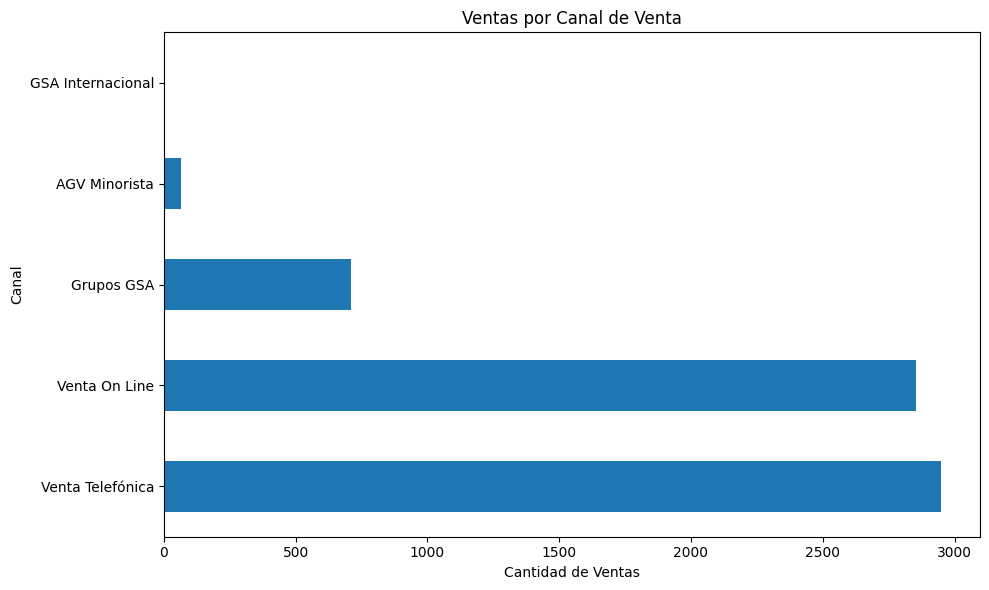

In [ ]:
#  Visualización 1: Ventas por canal
plt.figure(figsize=(10, 6))
ventas_full["Tipo de Canal"].value_counts().plot(kind='barh')
plt.title("Ventas por Canal de Venta")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Canal")
plt.tight_layout()
plt.show()

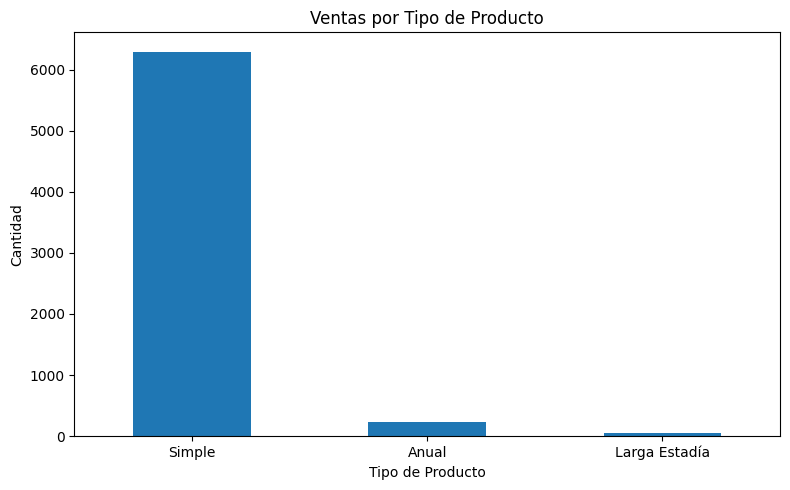

In [ ]:
#  Visualización 2: Ventas por tipo de producto
plt.figure(figsize=(8, 5))
ventas_full["Tipo de Producto"].value_counts().plot(kind='bar')
plt.title("Ventas por Tipo de Producto")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

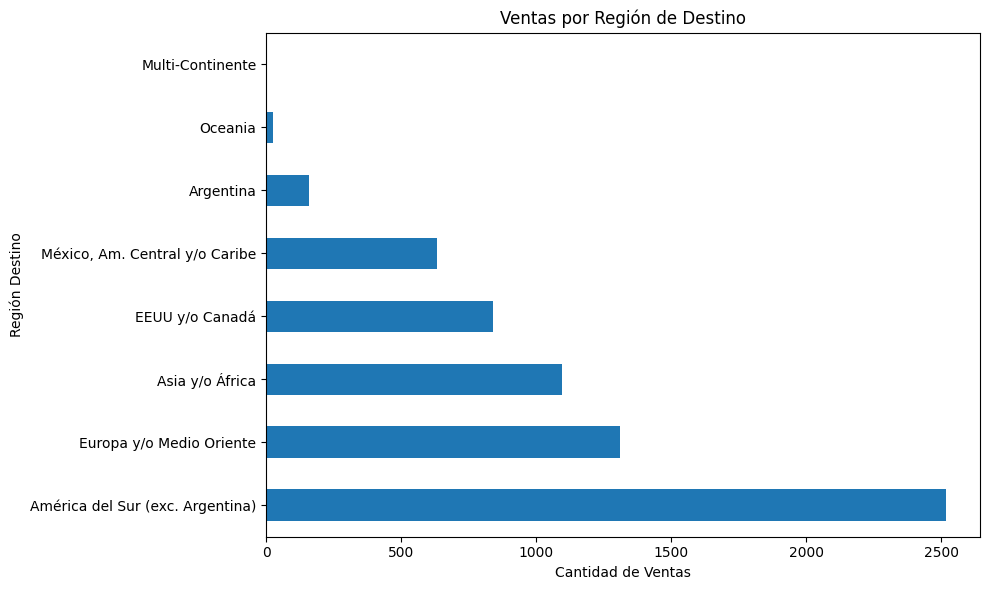

In [ ]:
# Visualización 3: Ventas por región destino
plt.figure(figsize=(10, 6))
ventas_full["Región Destino"].value_counts().plot(kind='barh')
plt.title("Ventas por Región de Destino")
plt.xlabel("Cantidad de Ventas")
plt.tight_layout()
plt.show()


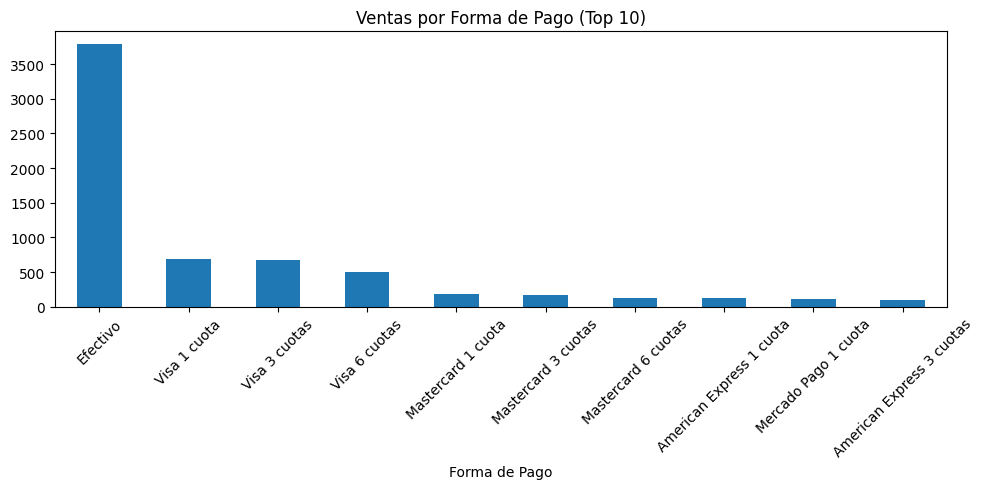

In [ ]:
# Visualización 4: Ventas por forma de pago
plt.figure(figsize=(10, 5))
ventas_full["Forma de Pago"].value_counts().head(10).plot(kind='bar')
plt.title("Ventas por Forma de Pago (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

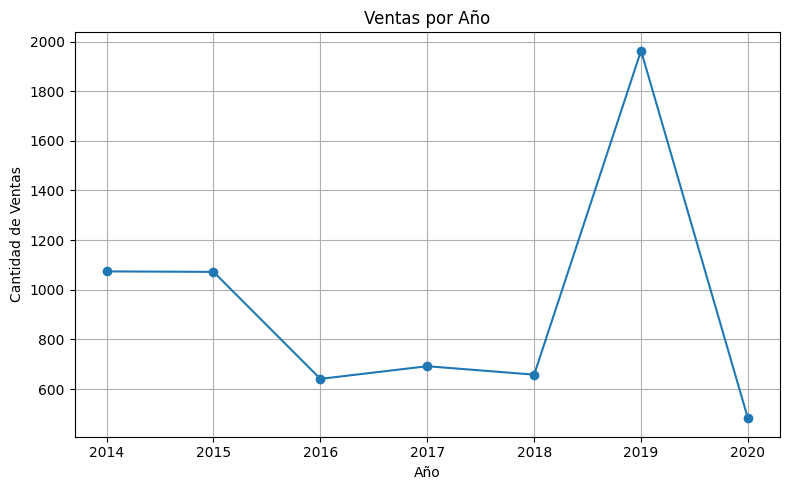

In [ ]:
#Visualización 5: Ventas por año
plt.figure(figsize=(8, 5))
ventas_full["Año Emisión"].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Ventas por Año")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Año")
plt.grid(True)
plt.tight_layout()
plt.show()

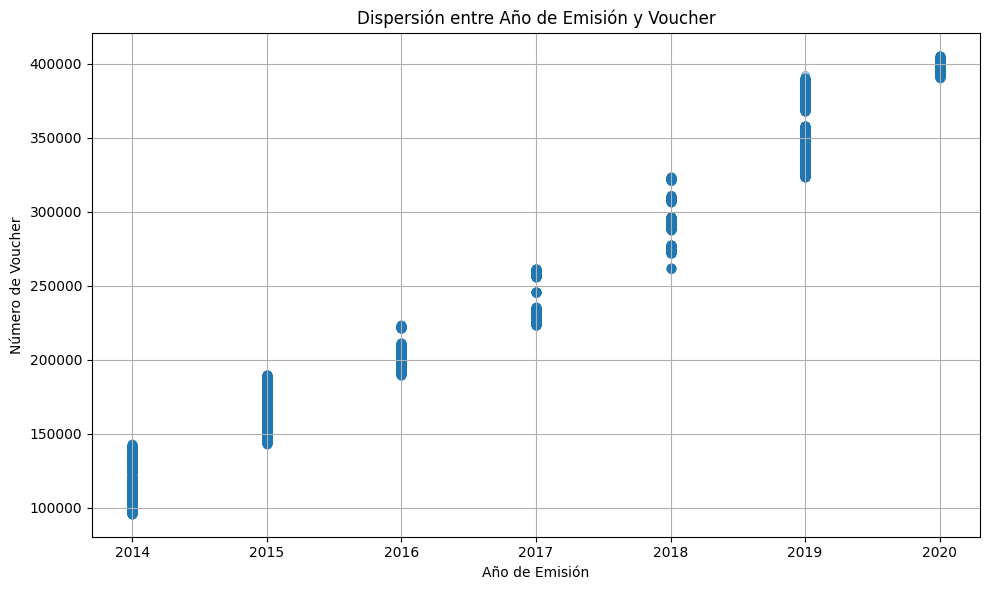

In [ ]:
#Disprecion entre Año de Emision  y Voucher
plt.figure(figsize=(10, 6))
plt.scatter(ventas_full["Año Emisión"], ventas_full["Voucher"], alpha=0.3)
plt.title("Dispersión entre Año de Emisión y Voucher")
plt.xlabel("Año de Emisión")
plt.ylabel("Número de Voucher")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

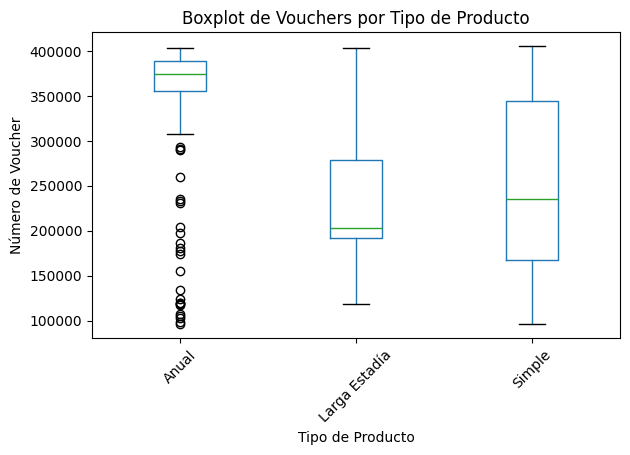

In [ ]:
#Boxplot DE Vouchers por Tipo de Producto
plt.figure(figsize=(10, 6))
ventas_full.boxplot(column="Voucher", by="Tipo de Producto", grid=False)
plt.title("Boxplot de Vouchers por Tipo de Producto")
plt.suptitle("")  # Elimina el título automático
plt.xlabel("Tipo de Producto")
plt.ylabel("Número de Voucher")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


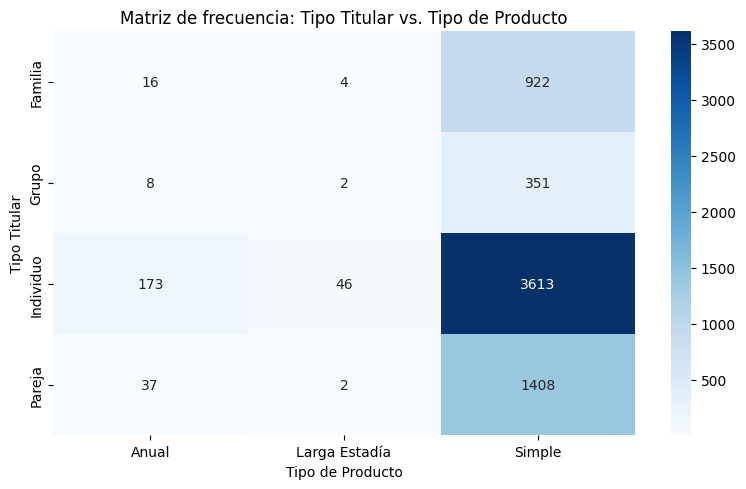

In [ ]:
#Matriz de frecuencia: Tipo Titular vs. Tipo de Producto
tabla = pd.crosstab(df['Tipo Titular'], df['Tipo de Producto'])

plt.figure(figsize=(8, 5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de frecuencia: Tipo Titular vs. Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Tipo Titular')
plt.tight_layout()
plt.show()

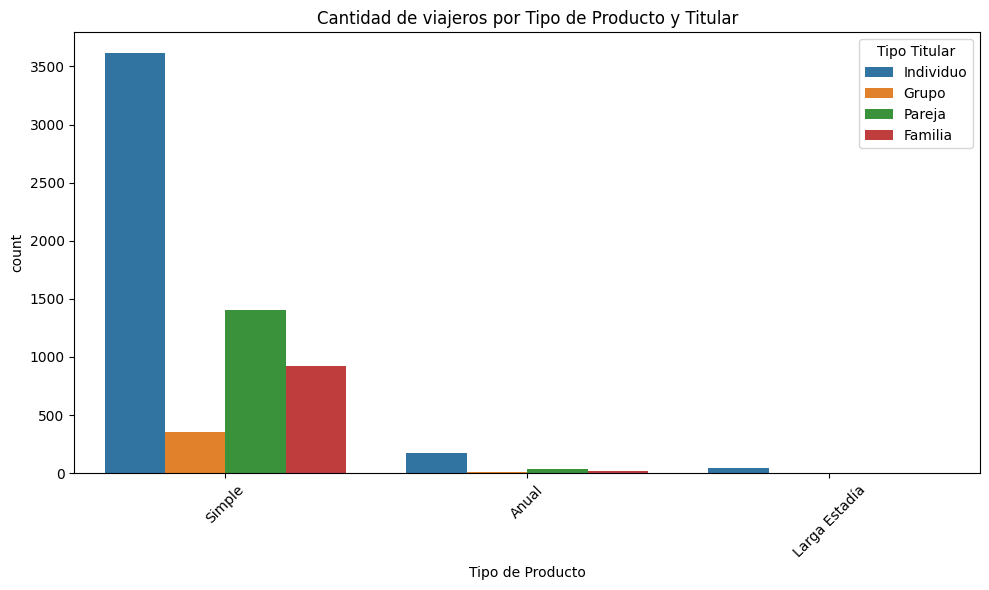

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo de Producto', hue='Tipo Titular')
plt.title('Cantidad de viajeros por Tipo de Producto y Titular')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

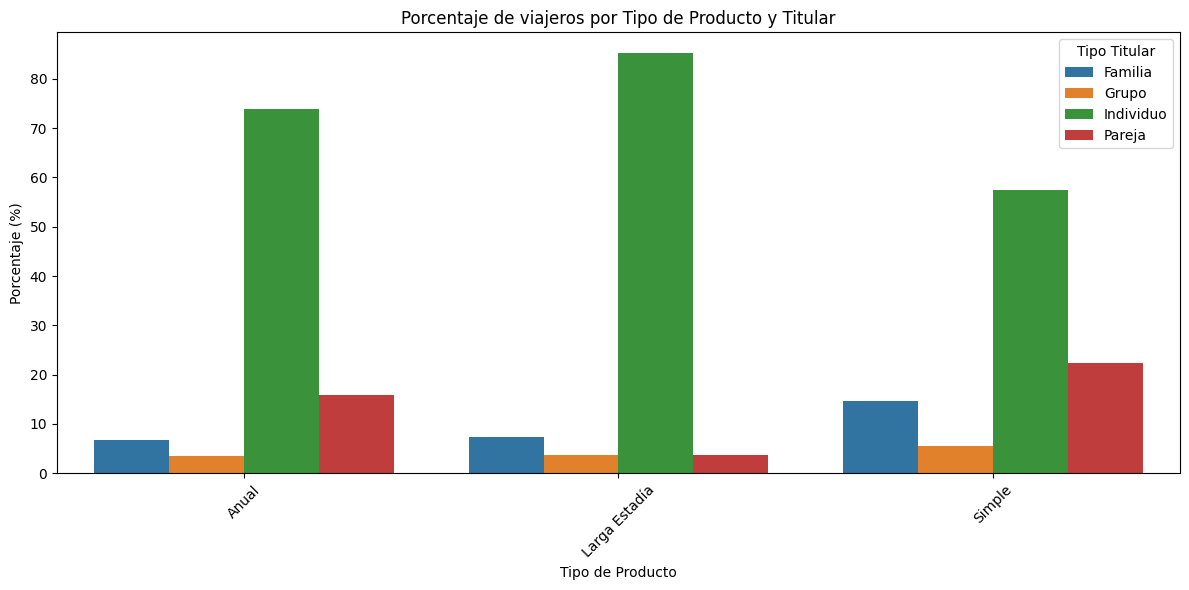

In [ ]:
# Calcular porcentajes por Tipo de Producto
df_grouped = df.groupby(['Tipo de Producto', 'Tipo Titular']).size().reset_index(name='count')
df_total = df_grouped.groupby('Tipo de Producto')['count'].transform('sum')
df_grouped['percent'] = df_grouped['count'] / df_total * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Tipo de Producto', y='percent', hue='Tipo Titular')
plt.title('Porcentaje de viajeros por Tipo de Producto y Titular')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preferencias de destino
América del Sur (excepto Argentina) concentra la mayor cantidad de ventas, indicando una clara preferencia por destinos regionales cercanos.

Europa, Asia/África y EE.UU./Canadá también representan mercados relevantes con demanda estable.

Destinos como Oceanía y Argentina tienen baja demanda, lo que sugiere oportunidades para campañas específicas o revisión de oferta.

 2. Canales de venta más utilizados
Venta Telefónica y Venta Online concentran casi la totalidad de las ventas, destacándose como los canales más efectivos.

Canales como GSA Internacional y AGV Minorista tienen un impacto casi nulo, por lo que podrían requerir rediseño o eliminación.

3. Formas de pago
Efectivo es el medio de pago más utilizado, superando ampliamente a todas las otras opciones.

El uso de tarjetas de crédito (Visa, Mastercard y American Express) en 1 y 3 cuotas también es relevante.

Mercado Pago tiene baja penetración, a pesar de ser un medio digital popular.

4. Tipo de titular y producto
Los individuos son el segmento más numeroso.

El producto "Simple" es el más vendido y el más elegido por todos los tipos de titulares (individuos, parejas, familias).

Productos como "Anual" y "Larga Estadía" tienen baja adopción y podrían requerir rediseño o segmentación más precisa.


5. Tendencias temporales
El año 2019 fue el de mayor volumen de ventas, probablemente impulsado por una estrategia efectiva o contexto favorable.

La caída drástica en 2020 coincide con la pandemia, lo que evidencia la vulnerabilidad del sector ante eventos globales.

Entre 2014 y 2018, las ventas mostraron estabilidad moderada con una leve tendencia a la baja.

Conclusión
Los datos revelan que existe un fuerte dominio de productos simples, canales directos (teléfono y web) y pagos en efectivo. Esto sugiere un cliente que prioriza la accesibilidad y confianza. El desafío está en diversificar los productos, optimizar canales de bajo rendimiento y adaptar la oferta a cambios contextuales como la pandemia.